<a href="https://colab.research.google.com/github/putricinto/Machine-Learning-Project---MLCC/blob/master/garbage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Upload to Colab

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juliussin","key":"06a57c9c9af0aa65910d615179472d80"}'}

### Kaggle Installation

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


### Garbage Classification - cchangcs
https://www.kaggle.com/asdasdasasdas/garbage-classification

In [3]:
!kaggle datasets download -d asdasdasasdas/garbage-classification

 79% 65.0M/82.0M [00:01<00:00, 21.8MB/s]
100% 82.0M/82.0M [00:01<00:00, 62.9MB/s]


### Unzip Dataset

In [0]:
!unzip -q garbage-classification.zip -d .
!rm -r Garbage\ classification
!mv garbage\ classification/Garbage\ classification garbage
!rm -r garbage\ classification

### Dataset Directories

In [0]:
import os

cardboard_dir = os.path.join('garbage', 'cardboard')
glass_dir = os.path.join('garbage', 'glass')
metal_dir = os.path.join('garbage', 'metal')
paper_dir = os.path.join('garbage', 'paper')
plastic_dir = os.path.join('garbage', 'plastic')
trash_dir = os.path.join('garbage', 'trash')

### Dataset Snippet

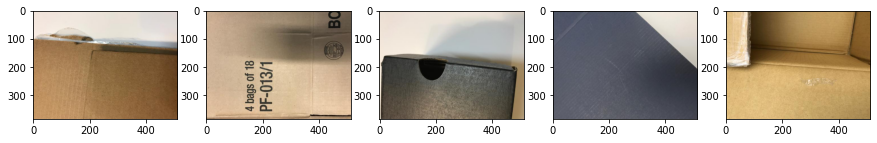

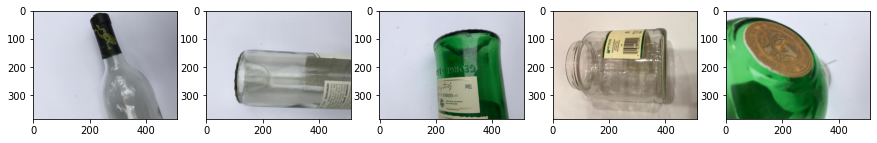

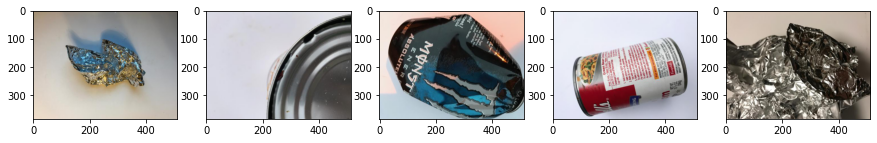

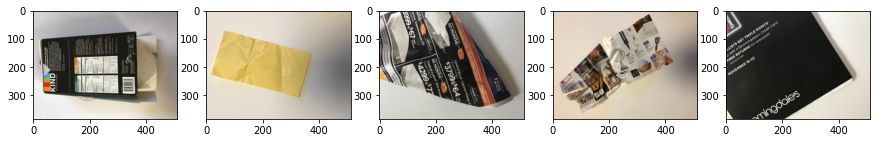

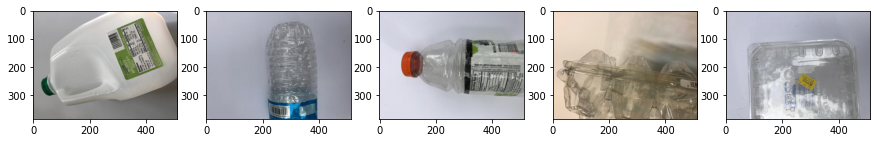

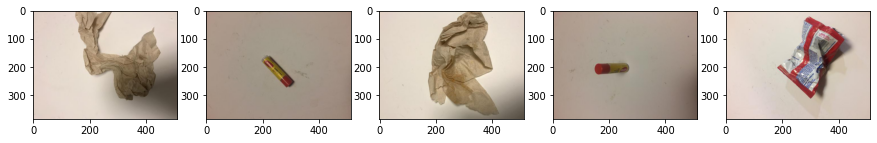

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

numb_of_pic = 5
random.seed()

rand_A = []
for i in range(numb_of_pic):
  rand_A.append(random.randint(0, len(os.listdir(cardboard_dir))))
rand_B = []
for i in range(numb_of_pic):
  rand_B.append(random.randint(0, len(os.listdir(glass_dir))))
rand_C = []
for i in range(numb_of_pic):
  rand_C.append(random.randint(0, len(os.listdir(metal_dir))))
rand_D = []
for i in range(numb_of_pic):
  rand_D.append(random.randint(0, len(os.listdir(paper_dir))))
rand_E = []
for i in range(numb_of_pic):
  rand_E.append(random.randint(0, len(os.listdir(plastic_dir))))
rand_F = []
for i in range(numb_of_pic):
  rand_F.append(random.randint(0, len(os.listdir(trash_dir))))

A_listdir = [os.listdir(cardboard_dir)[i] for i in rand_A]
B_listdir = [os.listdir(glass_dir)[i] for i in rand_B]
C_listdir = [os.listdir(metal_dir)[i] for i in rand_C]
D_listdir = [os.listdir(paper_dir)[i] for i in rand_D]
E_listdir = [os.listdir(plastic_dir)[i] for i in rand_E]
F_listdir = [os.listdir(trash_dir)[i] for i in rand_F]

A_listdir = [os.path.join(cardboard_dir, fname) for fname in A_listdir]
B_listdir = [os.path.join(glass_dir, fname) for fname in B_listdir]
C_listdir = [os.path.join(metal_dir, fname) for fname in C_listdir]
D_listdir = [os.path.join(paper_dir, fname) for fname in D_listdir]
E_listdir = [os.path.join(plastic_dir, fname) for fname in E_listdir]
F_listdir = [os.path.join(trash_dir, fname) for fname in F_listdir]

plt.figure(figsize=(15, 10))
for i, image in enumerate(A_listdir):
  img = mpimg.imread(image)
  plt.subplot(len(A_listdir) / numb_of_pic + 1, numb_of_pic, i + 1)
  plt.imshow(img)

plt.figure(figsize=(15, 10))
for i, image in enumerate(B_listdir):
  img = mpimg.imread(image)
  plt.subplot(len(B_listdir) / numb_of_pic + 1, numb_of_pic, i + 1)
  plt.imshow(img)

plt.figure(figsize=(15, 10))
for i, image in enumerate(C_listdir):
  img = mpimg.imread(image)
  plt.subplot(len(C_listdir) / numb_of_pic + 1, numb_of_pic, i + 1)
  plt.imshow(img)

plt.figure(figsize=(15, 10))
for i, image in enumerate(D_listdir):
  img = mpimg.imread(image)
  plt.subplot(len(D_listdir) / numb_of_pic + 1, numb_of_pic, i + 1)
  plt.imshow(img)

plt.figure(figsize=(15, 10))
for i, image in enumerate(E_listdir):
  img = mpimg.imread(image)
  plt.subplot(len(E_listdir) / numb_of_pic + 1, numb_of_pic, i + 1)
  plt.imshow(img)

plt.figure(figsize=(15, 10))
for i, image in enumerate(F_listdir):
  img = mpimg.imread(image)
  plt.subplot(len(F_listdir) / numb_of_pic + 1, numb_of_pic, i + 1)
  plt.imshow(img)

### Split Dataset (Failed)

In [0]:
from keras.preprocessing import image
import random

random.seed()
test_split = 0.2 
val_split = 0.2
list_dir = [cardboard_dir, glass_dir, metal_dir, 
            paper_dir, plastic_dir, trash_dir]

# Find amount of test data each category
test_num = []
for i in range(len(list_dir)):
  test_num.append(int(len(os.listdir(list_dir[i]))*test_split))

# Randomize index of data for test data
test_ind = []
for i in range(len(list_dir)):
  temp_ind = []
  for j in range(test_num[i]):
    temp_ind.append(random.randint(0, len(os.listdir(list_dir[i]))-1))
  test_ind.append(temp_ind)

# Store filename of data for test data
test_fname = []
for i in range(len(list_dir)):
  temp_fname = []
  for j in test_ind[i]:
    temp_fname.append(
        os.path.join(list_dir[i], os.listdir(list_dir[i])[j])
    )
  test_fname.append(temp_fname)

# filename = os.path.join(cardboard_dir, 'cardboard99.jpg')
# temp_image = image.load_img(filename)
# temp_image = img_to_array(temp_image)

# List train index
train_ind = []
for i in range(len(list_dir)):
  temp_ind = [ind for ind in os.listdir(list_dir[i]) if ind not in test_ind[i]]
  train_ind.append(temp_ind)

# Check intersection between train and test data
for i in range(len(list_dir)):
  if len(set(train_ind[i]).intersection(test_ind[i])) != 0:
    print('Train and Test Data Intersect! ' + list_dir[i])

# Split for validation
if val_split is not None:
  random.seed()

  val_num = []
  for i in range(len(list_dir)):
    val_num.append(int(len(os.listdir(list_dir[i]))*val_split))

  val_ind = []
  for i in range(len(list_dir)):
    temp_ind = []
    for j in range(val_num[i]):
      temp_ind.append(random.randint(0, len(os.listdir(list_dir[i]))-1))
    val_ind.append(temp_ind)

# print(train_ind)

Using TensorFlow backend.


### Split Dataset

In [6]:
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
import numpy as np

list_dir = [cardboard_dir, glass_dir, metal_dir, 
            paper_dir, plastic_dir, trash_dir]
test_split = 0.2
val_split = 0.2

x_fname = []
y_data = []

for i in range(len(list_dir)):
  temp = os.listdir(list_dir[i])
  temp = [os.path.join(list_dir[i], fname) for fname in temp]
  x_fname.extend(temp)
  y_data.extend([i] * len(os.listdir(list_dir[i])))

# x_data = []
# for fname in x_fname:
#   img = image.load_img(fname)
#   img = image.img_to_array(img)
#   x_data.append(img)

# x_data = np.array(x_data)
# y_data = np.array(y_data)
x_data = x_fname

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=test_split
)

if val_split is not None:
  x_train, x_val, y_train, y_val = train_test_split(
      x_train, y_train, test_size=val_split/(1-test_split)
  )

# print(len(y_train))
# print(len(y_test))
# print(len(y_val))

Using TensorFlow backend.


In [0]:
from shutil import copy

train_dir = '/tmp/train/'
test_dir = '/tmp/test/'
val_dir = '/tmp/validation/'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

categories = ['cardboard', 'glass', 'metal',
              'paper', 'plastic', 'trash']

for c in categories:
  os.makedirs(train_dir+c, exist_ok=True)
  os.makedirs(test_dir+c, exist_ok=True)
  os.makedirs(val_dir+c, exist_ok=True)

for ind in range(len(x_train)):
  if y_train[ind] == 0:
    copy(x_train[ind], os.path.join(train_dir, 'cardboard'))
  elif y_train[ind] == 1:
    copy(x_train[ind], os.path.join(train_dir, 'glass'))
  elif y_train[ind] == 2:
    copy(x_train[ind], os.path.join(train_dir, 'metal'))
  elif y_train[ind] == 3:
    copy(x_train[ind], os.path.join(train_dir, 'paper'))
  elif y_train[ind] == 4:
    copy(x_train[ind], os.path.join(train_dir, 'plastic'))
  elif y_train[ind] == 5:
    copy(x_train[ind], os.path.join(train_dir, 'trash'))

for ind in range(len(x_test)):
  if y_test[ind] == 0:
    copy(x_test[ind], os.path.join(test_dir, 'cardboard'))
  elif y_test[ind] == 1:
    copy(x_test[ind], os.path.join(test_dir, 'glass'))
  elif y_test[ind] == 2:
    copy(x_test[ind], os.path.join(test_dir, 'metal'))
  elif y_test[ind] == 3:
    copy(x_test[ind], os.path.join(test_dir, 'paper'))
  elif y_test[ind] == 4:
    copy(x_test[ind], os.path.join(test_dir, 'plastic'))
  elif y_test[ind] == 5:
    copy(x_test[ind], os.path.join(test_dir, 'trash'))

if val_split is not None:
  for ind in range(len(x_val)):
    if y_val[ind] == 0:
      copy(x_val[ind], os.path.join(val_dir, 'cardboard'))
    elif y_val[ind] == 1:
      copy(x_val[ind], os.path.join(val_dir, 'glass'))
    elif y_val[ind] == 2:
      copy(x_val[ind], os.path.join(val_dir, 'metal'))
    elif y_val[ind] == 3:
      copy(x_val[ind], os.path.join(val_dir, 'paper'))
    elif y_val[ind] == 4:
      copy(x_val[ind], os.path.join(val_dir, 'plastic'))
    elif y_val[ind] == 5:
      copy(x_val[ind], os.path.join(val_dir, 'trash'))

### Load Image

In [8]:
train_datagen = image.ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir, class_mode='categorical', batch_size=64, target_size=(256, 256)
)

datagen = image.ImageDataGenerator(rescale = 1.0/255.0)

test_generator = datagen.flow_from_directory(
    test_dir, class_mode='categorical', batch_size=32, target_size=(256, 256)
)

val_generator = datagen.flow_from_directory(
    val_dir, class_mode='categorical', batch_size=32, target_size=(256, 256)
)

Found 1515 images belonging to 6 classes.
Found 506 images belonging to 6 classes.
Found 506 images belonging to 6 classes.


### Create & Train Model (with pretrained Inception V3)

In [14]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape=(256, 256, 3), 
                                include_top=False)

for layer in pre_trained_model.layers:
    layer.trainable=False

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 14, 14, 768)


In [15]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = tf.keras.layers.Dropout(0.3)(x)                  
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x)         

model = tf.keras.Model(pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

history = model.fit(
    train_generator, 
    epochs=50, 
    steps_per_epoch=20, 
    validation_data = val_generator, 
    verbose = 1, 
    validation_steps=5
)

# model.summary()

Epoch 1/50
20/20 [==============================] - 20s 1s/step - loss: 10.3606 - accuracy: 0.3709 - val_loss: 1.9444 - val_accuracy: 0.5625
Epoch 2/50
20/20 [==============================] - 19s 968ms/step - loss: 1.3257 - accuracy: 0.5656 - val_loss: 0.7747 - val_accuracy: 0.6875
Epoch 3/50
20/20 [==============================] - 20s 988ms/step - loss: 0.9418 - accuracy: 0.6500 - val_loss: 0.6603 - val_accuracy: 0.7812
Epoch 4/50
20/20 [==============================] - 20s 996ms/step - loss: 0.8165 - accuracy: 0.7037 - val_loss: 0.5803 - val_accuracy: 0.7812
Epoch 5/50
20/20 [==============================] - 20s 1s/step - loss: 0.7081 - accuracy: 0.7284 - val_loss: 0.5658 - val_accuracy: 0.7437
Epoch 6/50
20/20 [==============================] - 20s 981ms/step - loss: 0.7227 - accuracy: 0.7379 - val_loss: 0.5146 - val_accuracy: 0.8375
Epoch 7/50
20/20 [==============================] - 19s 967ms/step - loss: 0.6193 - accuracy: 0.7760 - val_loss: 0.5399 - val_accuracy: 0.8062
Epoc

### Create & Train Model (with simple CNN)

In [0]:
import tensorflow as tf

# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(192, 256, 3)), #,256, 256, 3))
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     # tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(6, activation='softmax')
# ])

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(256, 256, 3)), #,256, 256, 3))
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

model.compile(
    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

history = model.fit(
    train_generator, 
    epochs=50, 
    steps_per_epoch=20, 
    validation_data = val_generator, 
    verbose = 1, 
    validation_steps=5
)

# model.save("rps.h5")

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 131072)           

In [0]:
loss = model.evaluate(test_generator, steps=10)

10/10 [==============================] - 1s 135ms/step - loss: 1.1885 - accuracy: 0.5875


### Visualize Loss and Accuracy

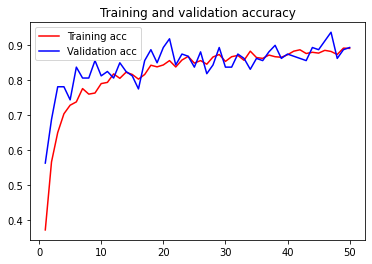

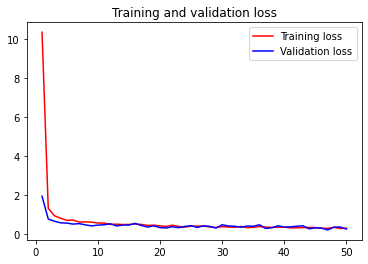

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

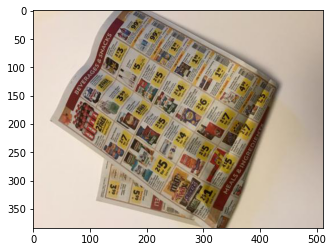

(1, 384, 512, 3)


In [0]:
import matplotlib.pyplot as plt

img_path = x_test[13]
img = image.load_img(img_path, target_size=(384, 512))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [0]:
layer_outputs = [layer.output for layer in model.layers[:5]] 
# Extracts the outputs of the top 12 layers

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
# Creates a model that will return these outputs, given the model input

In [0]:
layer_names = []
for layer in model.layers[:5]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

ValueError: ignored

In [0]:

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [0]:
pre_trained_model = InceptionV3()

96116736/96112376 [==============================] - 2s 0us/step


In [0]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________